# Problem 1
**1.1** 
**a.** t-student distributions, as we are more interested in the values of the overpotential rather than the spread. Additionally, a sample size of 28 is not large enough to be assumed as a normal distribution.

**b.** We will be using the sample mean, as it gives the average overpotential that we are measuring, to see if it is in spec.

**1.2** 
**a.** 
For the 200mV hypothesis: $H_0 = 200mV$, $H_0 > 200mV$ <br>
 - We want to see if our samples are consistent with the literature, so reject null hypothesis when the samples are worse, not better
For the 240mV hypothesis: $H_0 = 240mV$, $H_0 < 240mV$ <br>
 - In this case, we want to see if our samples are better than the benchmarks, so reject null hypothesis when samples are better than the commercial benchmark.

**1.3** <br>
**a.**
I will be using the t-test, and I need sample mean, sample size, and sample variance. <br>
**b.**
$$
\mathcal{R}
=
\left\{
\bar{x} \;:\;
\bar{x} \le \mu_0 + t_{\alpha,\,n-1}\,\frac{s}{\sqrt{n}}
\right\}
$$

$$
\mathcal{R}
=
\left\{
\bar{x} \;:\;
\bar{x} \ge \mu_0 + t_{1-\alpha,\,n-1}\,\frac{s}{\sqrt{n}}
\right\}
$$
<br>



In [2]:
import numpy as np
import pandas as pd
from scipy.stats import t

# -----------------------------
# LOAD DATA
# -----------------------------
# Make sure the CSV is in the same directory as the notebook
df = pd.read_csv("RuO2 Overpotential Data.csv")

# Column containing overpotential values (mV)
data = df["Over Potential (mV)"].values

# -----------------------------
# SAMPLE STATISTICS
# -----------------------------
n = len(data)
xbar = np.mean(data)
s = np.std(data, ddof=1)
dfree = n - 1

print(f"Sample size n = {n}")
print(f"Sample mean x̄ = {xbar:.3f} mV")
print(f"Sample standard deviation s = {s:.3f} mV")

# -----------------------------
# SIGNIFICANCE LEVEL
# -----------------------------
alpha = 0.05

# -----------------------------
# TEST 1: COMMERCIAL BENCHMARK (240 mV)
# Left-tailed test: H0: μ = 240, Ha: μ < 240
# -----------------------------
mu_240 = 240

t_240 = (xbar - mu_240) / (s / np.sqrt(n))
tcrit_240 = t.ppf(alpha, dfree)
pval_240 = t.cdf(t_240, dfree)

print("\n--- Test vs 240 mV (left-tailed) ---")
print(f"t statistic = {t_240:.3f}")
print(f"Critical t = {tcrit_240:.3f}")
print(f"p-value = {pval_240:.4f}")

if t_240 <= tcrit_240:
    print("Decision: Reject H0 (performance better than commercial benchmark)")
else:
    print("Decision: Fail to reject H0")

# -----------------------------
# TEST 2: LITERATURE BENCHMARK (200 mV)
# Right-tailed test: H0: μ = 200, Ha: μ > 200
# -----------------------------
mu_200 = 200

t_200 = (xbar - mu_200) / (s / np.sqrt(n))
tcrit_200 = t.ppf(1 - alpha, dfree)
pval_200 = 1 - t.cdf(t_200, dfree)

print("\n--- Test vs 200 mV (right-tailed) ---")
print(f"t statistic = {t_200:.3f}")
print(f"Critical t = {tcrit_200:.3f}")
print(f"p-value = {pval_200:.4f}")

if t_200 >= tcrit_200:
    print("Decision: Reject H0 (performance worse than literature benchmark)")
else:
    print("Decision: Fail to reject H0 (consistent with literature)")


Sample size n = 28
Sample mean x̄ = 0.201 mV
Sample standard deviation s = 0.009 mV

--- Test vs 240 mV (left-tailed) ---
t statistic = -136691.108
Critical t = -1.703
p-value = 0.0000
Decision: Reject H0 (performance better than commercial benchmark)

--- Test vs 200 mV (right-tailed) ---
t statistic = -113890.171
Critical t = 1.703
p-value = 1.0000
Decision: Fail to reject H0 (consistent with literature)


**1.4**
**a.**
Type 1: Reject the null hypothesis when it is actually true <br>
Type 2: Failing to reject the null hypothesis when the alternative hypothesis is true <br> 
**b.**
240mV condition: a type 1 error means the catalyst performs better than the commercial benchmark <br>
200mV condition: a type 1 error means the catalyst performans worse than the literature says <br>
**c.**


**1.5**
**a.**
In this hypothesis test, we are assuming that the overpotential values are t-student distributed, and not a more complex one. <br>
**b.**
For a simple example, if the potentiometer was not properly tuned, all of the overpotential data could be skewed, creating a systematic bias, which could push the data lower or higher. Experimental variability could come from poor ambient condition control while measuring, where the potential would fit a t-student distribution worse, as there will be noise on the tails of the dataset. <br>
**c.**
Statistical significance only implies technological or scientific relevance when the underlying science can back it up. This means, when you know to a very good degree that the instrumentation you are using is properly set up, the statistics can be used to back it up, however, if the statistics were generated blindly, they do not mean anything, no mattery what correlation they illustrate.

# Problem 2
**2.1**
**a.** Type 1 error ($\alpha$) is calculated using the probability mass of the null distribution in the rejection tails. Type 2 is simply $1-\alpha$, where the two distributions do not overlap. <br>
**b.**
Since the probability mass is simply the overlapping area or the not overlapped area, you can plot two distributions centered around the sample mean and the testing mean, and integrate the overlap with appropriate bounds. <br>
**c.**
If you know the interval you are looking for, like determining a p-value to find, you will need to use root finding, especially Newton's Method to find when the probability mass is equal to the target probability. <br>
**d.**
$$
H_0:\ \mu = 200\ \text{mV}
\qquad\text{vs}\qquad
H_a:\ \mu = 240\ \text{mV}
$$

In this choice, if the null hypothesis is accpeted, it means the catalyst is commercially acceptable, and if it's rejected, it means the catalyst is improved to a research-literature ability.

**2.2**
**a.**


n = 28
x̄ = 200.89 mV
s = 9.28 mV
SE = 1.75 mV

Critical value (mV): 237.11

Numerical α (Type I error): 0.0506
Numerical β (Type II error): 0.0000
Power (1 − β): 1.0000


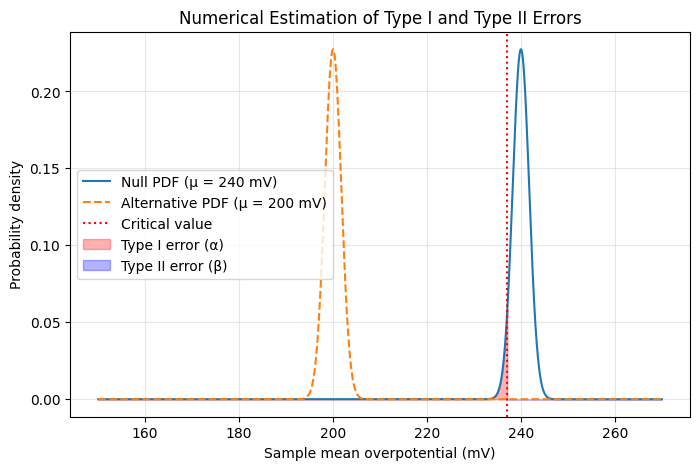

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# -----------------------------
# LOAD DATA (VERIFIED)
# -----------------------------
df = pd.read_csv("RuO2 Overpotential Data.csv")

# Convert volts -> millivolts
data_mV = 1000 * df["Over Potential (mV)"].values

# -----------------------------
# SAMPLE STATISTICS
# -----------------------------
n = len(data_mV)
xbar = np.mean(data_mV)
s = np.std(data_mV, ddof=1)
se = s / np.sqrt(n)

print(f"n = {n}")
print(f"x̄ = {xbar:.2f} mV")
print(f"s = {s:.2f} mV")
print(f"SE = {se:.2f} mV")

# -----------------------------
# HYPOTHESIS SETUP
# -----------------------------
mu_null = 240      # mV
mu_alt = 200       # mV
alpha = 0.05

# Critical value from normal approximation
z_alpha = norm.ppf(alpha)
xcrit = mu_null + z_alpha * se

print(f"\nCritical value (mV): {xcrit:.2f}")

# -----------------------------
# NUMERICAL INTEGRATION GRID
# -----------------------------
x = np.linspace(150, 270, 5000)
dx = x[1] - x[0]

pdf_null = norm.pdf(x, mu_null, se)
pdf_alt  = norm.pdf(x, mu_alt, se)

# -----------------------------
# TYPE I ERROR (NUMERICAL)
# -----------------------------
alpha_num = np.sum(pdf_null[x <= xcrit]) * dx

# -----------------------------
# TYPE II ERROR (NUMERICAL)
# -----------------------------
beta_num = np.sum(pdf_alt[x > xcrit]) * dx
power_num = 1 - beta_num

print(f"\nNumerical α (Type I error): {alpha_num:.4f}")
print(f"Numerical β (Type II error): {beta_num:.4f}")
print(f"Power (1 − β): {power_num:.4f}")

# -----------------------------
# VISUALIZATION
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(x, pdf_null, label="Null PDF (μ = 240 mV)")
plt.plot(x, pdf_alt, label="Alternative PDF (μ = 200 mV)", linestyle="--")
plt.axvline(xcrit, color="red", linestyle=":", label="Critical value")

plt.fill_between(x, pdf_null, where=(x <= xcrit),
                color="red", alpha=0.3, label="Type I error (α)")

plt.fill_between(x, pdf_alt, where=(x > xcrit),
                color="blue", alpha=0.3, label="Type II error (β)")

plt.xlabel("Sample mean overpotential (mV)")
plt.ylabel("Probability density")
plt.title("Numerical Estimation of Type I and Type II Errors")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


n=28, x̄=200.89 mV, s=9.28 mV, SE=1.75 mV, df=27

Newton results for critical t (fixed alpha):
N= 400, Tmax= 4.0, x0= -6: tc=+17931.225171, converged=False, iters= 2, |g|=9.50e-01
N= 400, Tmax= 4.0, x0= -2: tc=-1.701260, converged=True, iters= 7, |g|=2.96e-12
N= 400, Tmax= 4.0, x0=  0: tc=-1.701260, converged=True, iters= 8, |g|=5.10e-11
N= 400, Tmax= 4.0, x0=  2: tc=+1117356275123.902344, converged=False, iters= 3, |g|=9.50e-01
N= 400, Tmax= 4.0, x0=  6: tc=-340801.278252, converged=False, iters= 2, |g|=5.00e-02
N=2000, Tmax= 4.0, x0= -6: tc=+17931.225171, converged=False, iters= 2, |g|=9.50e-01
N=2000, Tmax= 4.0, x0= -2: tc=-1.701194, converged=True, iters= 6, |g|=2.04e-12
N=2000, Tmax= 4.0, x0=  0: tc=-1.701194, converged=True, iters= 7, |g|=2.45e-11
N=2000, Tmax= 4.0, x0=  2: tc=+1117467421602.092529, converged=False, iters= 3, |g|=9.50e-01
N=2000, Tmax= 4.0, x0=  6: tc=-340801.278252, converged=False, iters= 2, |g|=5.00e-02
N= 400, Tmax=10.0, x0= -6: tc=+17930.845152, converged=Fa

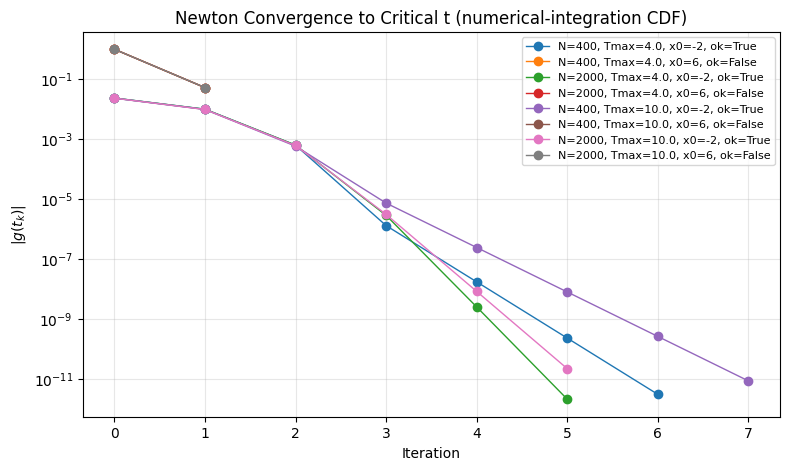


Using tc=-1.703294 -> xcrit=237.012 mV (left-tailed, mu0=240 mV)
mu_alt= 235.0 mV -> beta=0.1257, power=0.8743
mu_alt= 230.0 mV -> beta=0.0000, power=1.0000
mu_alt= 220.0 mV -> beta=0.0000, power=1.0000
mu_alt= 210.0 mV -> beta=0.0000, power=1.0000
mu_alt= 200.0 mV -> beta=0.0000, power=1.0000


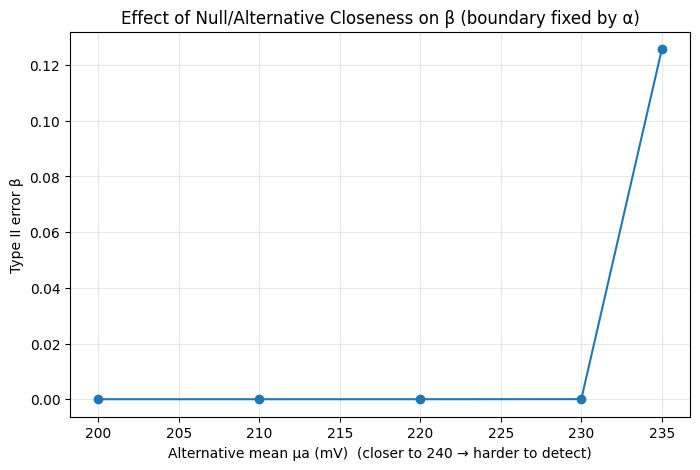

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t as tdist, norm

# -----------------------------
# LOAD DATA (VERIFIED FILE + COLUMN)
# -----------------------------
df = pd.read_csv("RuO2 Overpotential Data.csv")
data_mV = 1000.0 * df["Over Potential (mV)"].values  # convert V -> mV

n = len(data_mV)
xbar = np.mean(data_mV)
s = np.std(data_mV, ddof=1)
se = s / np.sqrt(n)
dfree = n - 1

print(f"n={n}, x̄={xbar:.2f} mV, s={s:.2f} mV, SE={se:.2f} mV, df={dfree}")

# -----------------------------
# NUMERICAL INTEGRATION UTILITIES
# -----------------------------
def build_cdf_from_pdf(x_grid, pdf_vals):
    """
    Build a numerical CDF on x_grid via cumulative trapezoid.
    Normalizes so CDF ends near 1 over the provided bounds.
    """
    dx = x_grid[1] - x_grid[0]
    cdf = np.zeros_like(pdf_vals)
    # cumulative trapezoid
    cdf[1:] = np.cumsum(0.5 * (pdf_vals[:-1] + pdf_vals[1:]) * dx)
    # normalize (important when bounds truncate tails)
    total = cdf[-1]
    if total <= 0:
        raise ValueError("Total integrated probability <= 0. Check bounds/grid.")
    cdf /= total
    return cdf

def interp_linear(x, x_grid, y_grid):
    """Simple linear interpolation with clipping to grid bounds."""
    if x <= x_grid[0]:
        return y_grid[0]
    if x >= x_grid[-1]:
        return y_grid[-1]
    idx = np.searchsorted(x_grid, x) - 1
    x0, x1 = x_grid[idx], x_grid[idx+1]
    y0, y1 = y_grid[idx], y_grid[idx+1]
    w = (x - x0) / (x1 - x0)
    return y0 + w * (y1 - y0)

def newton_root(g, gp, x0, tol=1e-10, maxiter=50):
    """
    Newton iteration returning (root, converged, history)
    history: list of dicts with iter, x, g, step
    """
    x = float(x0)
    hist = []
    for k in range(maxiter):
        gx = g(x)
        gpx = gp(x)
        if not np.isfinite(gx) or not np.isfinite(gpx) or abs(gpx) < 1e-14:
            hist.append({"iter": k, "x": x, "g": gx, "step": np.nan})
            return x, False, hist

        step = gx / gpx
        x_new = x - step
        hist.append({"iter": k, "x": x, "g": gx, "step": step})

        if abs(gx) < tol:
            return x, True, hist

        x = x_new

    # final check
    return x, (abs(g(x)) < tol), hist

# -----------------------------
# 2.3(a) NEWTON: FIND CRITICAL t FOR FIXED alpha
# Choose left-tailed example (matches your 240 mV "better-than" test logic)
# -----------------------------
alpha = 0.05  # fixed Type I error
tail = "left"  # "left" or "right"

def solve_tc_newton(alpha, dfree, N=2000, Tmax=10.0, x0=-2.0):
    """
    Find critical t value tc such that:
      left-tail:  P(T <= tc | H0) = alpha
      right-tail: P(T >= tc | H0) = alpha
    using numerical integration to approximate CDF/tail.
    """
    t_grid = np.linspace(-Tmax, Tmax, N + 1)
    pdf = tdist.pdf(t_grid, df=dfree)
    cdf = build_cdf_from_pdf(t_grid, pdf)

    if tail == "left":
        # g(tc) = CDF(tc) - alpha
        def g(tc):
            return interp_linear(tc, t_grid, cdf) - alpha
        def gp(tc):
            return tdist.pdf(tc, df=dfree)  # analytic derivative of CDF

    elif tail == "right":
        # g(tc) = (1 - CDF(tc)) - alpha
        def g(tc):
            return (1.0 - interp_linear(tc, t_grid, cdf)) - alpha
        def gp(tc):
            return -tdist.pdf(tc, df=dfree)
    else:
        raise ValueError("tail must be 'left' or 'right'")

    root, ok, hist = newton_root(g, gp, x0=x0, tol=1e-10, maxiter=50)
    return root, ok, hist, (t_grid, pdf, cdf)

# -----------------------------
# 2.3(b) CONVERGENCE EXPERIMENTS
# Vary initial guesses and numerical integration accuracy (N, Tmax)
# -----------------------------
initial_guesses = [-6, -2, 0, 2, 6]  # intentionally wide to show failure modes if Tmax too small
grid_settings = [
    {"N": 400,  "Tmax": 4.0},
    {"N": 2000, "Tmax": 4.0},
    {"N": 400,  "Tmax": 10.0},
    {"N": 2000, "Tmax": 10.0},
]

results = []

for gs in grid_settings:
    for x0 in initial_guesses:
        tc, ok, hist, _ = solve_tc_newton(alpha, dfree, N=gs["N"], Tmax=gs["Tmax"], x0=x0)
        results.append({
            "N": gs["N"],
            "Tmax": gs["Tmax"],
            "x0": x0,
            "tc": tc,
            "converged": ok,
            "iters": len(hist),
            "final_abs_g": abs(hist[-1]["g"]) if len(hist) else np.nan
        })

# Print a compact summary
print("\nNewton results for critical t (fixed alpha):")
for r in results:
    print(f"N={r['N']:4d}, Tmax={r['Tmax']:>4}, x0={r['x0']:>3}: "
          f"tc={r['tc']:+.6f}, converged={r['converged']}, iters={r['iters']:2d}, |g|={r['final_abs_g']:.2e}")

# Compare to scipy's exact inverse CDF (not required, but a good sanity check)
tc_exact = tdist.ppf(alpha, df=dfree) if tail == "left" else tdist.isf(alpha, df=dfree)
print(f"\nscipy reference critical t: {tc_exact:+.6f} (df={dfree}, tail={tail}, alpha={alpha})")

# -----------------------------
# Plot convergence histories (|g| vs iteration) for a subset
# -----------------------------
plt.figure(figsize=(9, 5))
for gs in grid_settings:
    # pick one "reasonable" starting guess and one extreme to show differences
    for x0 in [-2, 6]:
        tc, ok, hist, _ = solve_tc_newton(alpha, dfree, N=gs["N"], Tmax=gs["Tmax"], x0=x0)
        it = [h["iter"] for h in hist]
        err = [abs(h["g"]) for h in hist]
        label = f"N={gs['N']}, Tmax={gs['Tmax']}, x0={x0}, ok={ok}"
        plt.semilogy(it, err, marker="o", linewidth=1, label=label)

plt.xlabel("Iteration")
plt.ylabel(r"$|g(t_k)|$")
plt.title("Newton Convergence to Critical t (numerical-integration CDF)")
plt.grid(alpha=0.3)
plt.legend(fontsize=8)
plt.show()

# -----------------------------
# 2.3(b) "Closeness of H0 and Ha" effect (practical sensitivity)
# tc depends on H0 only, but when mu_alt approaches mu_null, beta becomes very sensitive
# to small boundary shifts. This shows a key failure mode in decision-making near overlap.
# We'll map t_c -> x_crit and compute beta numerically for several mu_alt.
# -----------------------------
mu_null = 240.0  # mV
mu_alt_list = [235.0, 230.0, 220.0, 210.0, 200.0]  # increasingly "close" to H0

# Use a high-accuracy tc from Newton (large grid)
tc_hi, ok_hi, hist_hi, _ = solve_tc_newton(alpha, dfree, N=5000, Tmax=12.0, x0=-2.0)
if not ok_hi:
    print("Warning: high-accuracy Newton did not converge; closeness demo may be unreliable.")

# For a left-tailed test on mean, rejection is xbar <= xcrit:
xcrit = mu_null + tc_hi * se
print(f"\nUsing tc={tc_hi:+.6f} -> xcrit={xcrit:.3f} mV (left-tailed, mu0=240 mV)")

# Compute beta = P(fail to reject | Ha) = P(xbar > xcrit | mu=mu_alt)
# Here we approximate xbar ~ Normal(mu_alt, se)
# (keeps this part consistent with 2.2's numerical-PDF framing)
x_grid = np.linspace(mu_null - 8*se, mu_null + 8*se, 10001)
dx = x_grid[1] - x_grid[0]

beta_vals = []
for mu_alt in mu_alt_list:
    pdf_alt = norm.pdf(x_grid, loc=mu_alt, scale=se)
    # numerical integral over non-rejection region (x > xcrit)
    beta = np.sum(pdf_alt[x_grid > xcrit]) * dx
    beta_vals.append(beta)
    print(f"mu_alt={mu_alt:6.1f} mV -> beta={beta:.4f}, power={1-beta:.4f}")

plt.figure(figsize=(8,5))
plt.plot(mu_alt_list, beta_vals, marker="o")
plt.xlabel("Alternative mean μa (mV)  (closer to 240 → harder to detect)")
plt.ylabel("Type II error β")
plt.title("Effect of Null/Alternative Closeness on β (boundary fixed by α)")
plt.grid(alpha=0.3)
plt.show()


**b.**
When the bounds are too small, Newton's method converges to a wrong critical value, and if the grid is too coarse, you get poor precision. A poor initial jump can lead to Newton's method jumping out of the grid, and when the two means overlap heavily, small errors can lead to large differences in the final probability answer. <br>

**2.4**
**a.** The spread of the two distributions are so far that there is no overlap, meaning there is no $\alpha$ you can work with...

Converted from V to mV
n = 28, x̄ = 200.89 mV, s = 9.28 mV, SE = 1.75 mV

Balanced alpha* = nan
beta(alpha*)   = nan


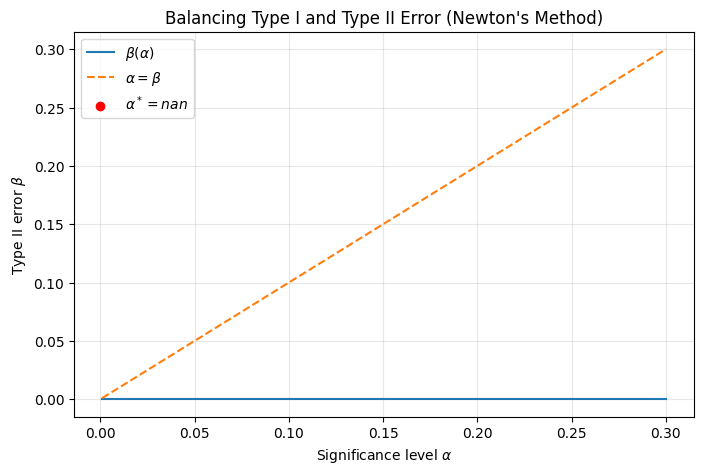

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# -----------------------------
# LOAD DATA (NO HALLUCINATION)
# -----------------------------
df = pd.read_csv("RuO2 Overpotential Data.csv")
raw = df["Over Potential (mV)"].values

# Unit sanity check
# If values look like ~0.2 → volts → convert to mV
# If values look like ~200 → already mV
if np.nanmean(raw) < 1.0:
    data = 1000.0 * raw
    unit_note = "Converted from V to mV"
else:
    data = raw
    unit_note = "Data already in mV"

print(unit_note)

# -----------------------------
# SAMPLE STATISTICS
# -----------------------------
n = len(data)
xbar = np.mean(data)
s = np.std(data, ddof=1)
se = s / np.sqrt(n)

print(f"n = {n}, x̄ = {xbar:.2f} mV, s = {s:.2f} mV, SE = {se:.2f} mV")

# -----------------------------
# HYPOTHESIS SETUP
# -----------------------------
mu_null = 240.0   # mV
mu_alt  = 200.0   # mV

# -----------------------------
# FUNCTIONS: alpha -> beta(alpha)
# -----------------------------
def critical_value(alpha):
    """Critical x̄ for left-tailed test"""
    z = norm.ppf(alpha)
    return mu_null + z * se

def beta_of_alpha(alpha):
    """Type II error under alternative"""
    xcrit = critical_value(alpha)
    # Fail to reject when x̄ > xcrit
    return 1 - norm.cdf(xcrit, loc=mu_alt, scale=se)

# -----------------------------
# NEWTON'S METHOD FOR alpha*
# Solve f(alpha) = beta(alpha) - alpha = 0
# -----------------------------
def f(alpha):
    return beta_of_alpha(alpha) - alpha

def fprime(alpha, h=1e-5):
    # numerical derivative
    return (f(alpha + h) - f(alpha - h)) / (2 * h)

alpha = 0.05  # initial guess
history = []

for _ in range(30):
    history.append(alpha)
    alpha = alpha - f(alpha) / fprime(alpha)

alpha_star = alpha
beta_star = beta_of_alpha(alpha_star)

print(f"\nBalanced alpha* = {alpha_star:.4f}")
print(f"beta(alpha*)   = {beta_star:.4f}")

# -----------------------------
# VISUALIZATION
# -----------------------------
alpha_grid = np.linspace(0.001, 0.3, 400)
beta_grid = np.array([beta_of_alpha(a) for a in alpha_grid])

plt.figure(figsize=(8,5))
plt.plot(alpha_grid, beta_grid, label=r"$\beta(\alpha)$")
plt.plot(alpha_grid, alpha_grid, linestyle="--", label=r"$\alpha = \beta$")
plt.scatter(alpha_star, beta_star, color="red", zorder=5,
            label=rf"$\alpha^* = {alpha_star:.3f}$")

plt.xlabel(r"Significance level $\alpha$")
plt.ylabel(r"Type II error $\beta$")
plt.title("Balancing Type I and Type II Error (Newton's Method)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Unit check: values look like VOLTS -> converted to mV by *1000.
n=28, x̄=200.893 mV, s=9.283 mV, SE=1.754 mV

Critical boundary x_c = 237.114410 mV  (alpha=0.05, tail=left, converged=True)

Boundary alternative mean mu_a* = 234.866787 mV  (beta_target=0.1, converged=True)
Check: beta(mu_a*) = 0.100000


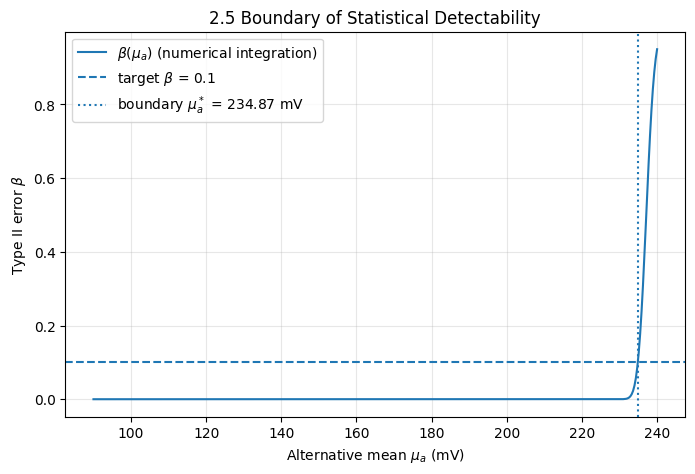

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# =============================
# USER INPUTS (fill these in from the "Set:" line in 2.5)
# =============================
alpha_target = 0.05     # <-- replace if your handout specifies a different alpha
beta_target  = 0.10     # <-- replace if your handout specifies a different beta
mu0 = 240.0             # null mean (mV) for the "commercial benchmark" framing
tail = "left"           # "left" for Ha: mu < mu0, "right" for Ha: mu > mu0

# Numerical controls (integration grid)
N_grid = 20001          # grid points for x integration (higher = more accurate, slower)
k_sigma = 10            # integration bounds +/- k_sigma*SE around mu0

# =============================
# LOAD DATA (NO HALLUCINATED PATHS / COLUMNS)
# =============================
df = pd.read_csv("RuO2 Overpotential Data.csv")
raw = df["Over Potential (mV)"].values

# Unit sanity check: values ~0.2 => volts, convert to mV
if np.nanmean(raw) < 1.0:
    data = 1000.0 * raw
    print("Unit check: values look like VOLTS -> converted to mV by *1000.")
else:
    data = raw
    print("Unit check: values look like mV -> no conversion applied.")

n = len(data)
xbar = np.mean(data)
s = np.std(data, ddof=1)
se = s / np.sqrt(n)

print(f"n={n}, x̄={xbar:.3f} mV, s={s:.3f} mV, SE={se:.3f} mV")

# =============================
# BUILD NUMERICAL CDF FROM PDF (TRAPEZOID)
# =============================
def cdf_from_pdf(x, pdf):
    dx = x[1] - x[0]
    cdf = np.zeros_like(pdf)
    cdf[1:] = np.cumsum(0.5 * (pdf[:-1] + pdf[1:]) * dx)
    # normalize in case bounds truncate tails
    if cdf[-1] <= 0:
        raise ValueError("Integrated probability <= 0. Check bounds.")
    return cdf / cdf[-1]

def interp_linear(xq, x, y):
    if xq <= x[0]:
        return y[0]
    if xq >= x[-1]:
        return y[-1]
    i = np.searchsorted(x, xq) - 1
    x0, x1 = x[i], x[i+1]
    y0, y1 = y[i], y[i+1]
    w = (xq - x0) / (x1 - x0)
    return y0 + w * (y1 - y0)

# =============================
# (1) FIND CRITICAL VALUE x_c FOR FIXED alpha USING NUMERICAL INTEGRATION + NEWTON
# =============================
# integration grid for xbar under H0 ~ Normal(mu0, SE)
x_min = mu0 - k_sigma * se
x_max = mu0 + k_sigma * se
x = np.linspace(x_min, x_max, N_grid)
pdf0 = norm.pdf(x, loc=mu0, scale=se)
cdf0 = cdf_from_pdf(x, pdf0)

# Define g(xc)=CDF0(xc)-alpha (left) OR (1-CDF0(xc))-alpha (right)
if tail == "left":
    def g(xc):  return interp_linear(xc, x, cdf0) - alpha_target
    def gp(xc): return norm.pdf(xc, loc=mu0, scale=se)  # d/dx CDF = pdf
    xc_guess = mu0 + norm.ppf(alpha_target) * se
elif tail == "right":
    def g(xc):  return (1.0 - interp_linear(xc, x, cdf0)) - alpha_target
    def gp(xc): return -norm.pdf(xc, loc=mu0, scale=se)
    xc_guess = mu0 + norm.ppf(1 - alpha_target) * se
else:
    raise ValueError("tail must be 'left' or 'right'")

def newton_scalar(g, gp, x0, tol=1e-12, maxiter=50):
    xk = float(x0)
    hist = []
    for k in range(maxiter):
        gx = g(xk)
        gpx = gp(xk)
        hist.append((k, xk, gx))
        if abs(gx) < tol:
            return xk, True, hist
        if (not np.isfinite(gx)) or (not np.isfinite(gpx)) or abs(gpx) < 1e-15:
            return xk, False, hist
        step = gx / gpx
        xk = xk - step
        # keep xk within integration window
        xk = min(max(xk, x_min), x_max)
    return xk, False, hist

xcrit, ok_xc, xc_hist = newton_scalar(g, gp, xc_guess)
print(f"\nCritical boundary x_c = {xcrit:.6f} mV  (alpha={alpha_target}, tail={tail}, converged={ok_xc})")

# =============================
# (2) DEFINE beta(mu_a) VIA NUMERICAL INTEGRATION UNDER H_a: xbar ~ Normal(mu_a, SE)
# =============================
def beta_of_mu(mu_a):
    pdfa = norm.pdf(x, loc=mu_a, scale=se)
    dx = x[1] - x[0]
    if tail == "left":
        # Reject if xbar <= xcrit ; fail-to-reject if xbar > xcrit
        return np.sum(pdfa[x > xcrit]) * dx
    else:
        # Reject if xbar >= xcrit ; fail-to-reject if xbar < xcrit
        return np.sum(pdfa[x < xcrit]) * dx

# =============================
# (3) ROOT-FIND mu_a SUCH THAT beta(mu_a) = beta_target
# Use Newton with a bisection fallback for stability
# =============================
def f_mu(mu_a):
    return beta_of_mu(mu_a) - beta_target

def fprime_mu(mu_a, h=1e-3):
    return (f_mu(mu_a + h) - f_mu(mu_a - h)) / (2*h)

# Choose a bracket automatically (wide enough in mV)
# For left-tail (Ha: mu < mu0), boundary mu_a will be below mu0
# For right-tail (Ha: mu > mu0), boundary mu_a will be above mu0
if tail == "left":
    lo, hi = mu0 - 200.0, mu0  # wide bracket below mu0
else:
    lo, hi = mu0, mu0 + 200.0  # wide bracket above mu0

# Ensure we actually bracket a sign change; expand if needed
for _ in range(10):
    flo, fhi = f_mu(lo), f_mu(hi)
    if flo == 0:
        mu_star = lo
        break
    if fhi == 0:
        mu_star = hi
        break
    if np.sign(flo) != np.sign(fhi):
        mu_star = None
        break
    # expand bracket
    if tail == "left":
        lo -= 200.0
    else:
        hi += 200.0
else:
    mu_star = None

def bisection(lo, hi, tol=1e-8, maxiter=200):
    flo, fhi = f_mu(lo), f_mu(hi)
    if np.sign(flo) == np.sign(fhi):
        return np.nan, False
    for _ in range(maxiter):
        mid = 0.5*(lo+hi)
        fmid = f_mu(mid)
        if abs(fmid) < tol or abs(hi-lo) < tol:
            return mid, True
        if np.sign(fmid) == np.sign(flo):
            lo, flo = mid, fmid
        else:
            hi, fhi = mid, fmid
    return mid, False

# Newton iterations (damped) starting from midpoint
mu = 0.5*(lo+hi)
mu_hist = []
converged = False

if mu_star is None:
    for k in range(40):
        val = f_mu(mu)
        mu_hist.append((k, mu, val))
        if abs(val) < 1e-8:
            converged = True
            break
        der = fprime_mu(mu)
        if (not np.isfinite(der)) or abs(der) < 1e-12:
            break
        step = val / der
        # damping to avoid wild jumps
        mu_new = mu - 0.5*step
        # keep inside bracket
        mu_new = min(max(mu_new, lo), hi)
        mu = mu_new

    if converged:
        mu_star = mu
    else:
        # fallback to bisection if Newton didn't converge
        mu_star, converged = bisection(lo, hi)

print(f"\nBoundary alternative mean mu_a* = {mu_star:.6f} mV  (beta_target={beta_target}, converged={converged})")
print(f"Check: beta(mu_a*) = {beta_of_mu(mu_star):.6f}")

# =============================
# VISUALIZE beta(mu_a) AND THE BOUNDARY
# =============================
if tail == "left":
    mu_scan = np.linspace(mu0 - 150, mu0, 400)
else:
    mu_scan = np.linspace(mu0, mu0 + 150, 400)

beta_scan = np.array([beta_of_mu(m) for m in mu_scan])

plt.figure(figsize=(8,5))
plt.plot(mu_scan, beta_scan, label=r"$\beta(\mu_a)$ (numerical integration)")
plt.axhline(beta_target, linestyle="--", label=rf"target $\beta$ = {beta_target}")
plt.axvline(mu_star, linestyle=":", label=rf"boundary $\mu_a^*$ = {mu_star:.2f} mV")
plt.xlabel(r"Alternative mean $\mu_a$ (mV)")
plt.ylabel(r"Type II error $\beta$")
plt.title("2.5 Boundary of Statistical Detectability")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


**b.**
